In [1]:
pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 55.1/55.1 kB 219.9 kB/s eta 0:00:00
  Using cached chardet-3.0.4-py2.py3-none-any.whl (133 kB)
     -------------------------------------- 42.6/42.6 kB 297.2 kB/s eta 0:00:00
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
     ---------------------------------------- 1.2/1.2 MB 878.8 kB/s eta 0:00:00
     ---------------------------------------- 53.6/53.6 kB 2.7 MB/s eta 0:00:00
     -------------------------------------- 65.0/65.0 kB 883.9 kB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17461 sha256=f7f204c646f8fc4d35cefb2d20714a6110c8936cc1a767d07f9cee9f986c07b0
  Stored in directory: c:\users\tejesh\appdata\local\pip\cache\wheels\54\ca\27\562b6eac3a495887e4b44bac3a1efe925fa603d085ba89a21d
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installati

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
conda-repo-cli 1.0.41 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.41 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.


In [3]:
pip install pybraille

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [8 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\Tejesh\AppData\Local\Temp\pip-install-4biepu2_\pybraille_057510bf5a0d419d8e570b1a26fa54ff\setup.py", line 4, in <module>
      long_description = rd.read()
    File "C:\Users\Tejesh\anaconda3\New folder (2)\lib\encodings\cp1252.py", line 23, in decode
      return codecs.charmap_decode(input,self.errors,decoding_table)[0]
  UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 406: character maps to <undefined>
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not

# English to Kannada

In [6]:
import os
from googletrans import Translator
from gtts import gTTS
import speech_recognition as sr
# Braille mapping for Kannada (simplified example; add more mappings as needed)
BRAILLE_MAPPING = {
    # Vowels
    'ಅ': '⠁', 'ಆ': '⠃', 'ಇ': '⠉', 'ಈ': '⠋',
    'ಉ': '⠙', 'ಊ': '⠑', 'ಋ': '⠚', 'ಎ': '⠛',
    'ಏ': '⠓', 'ಐ': '⠊', 'ಒ': '⠚', 'ಓ': '⠅',
    'ಔ': '⠇', 'ಅಂ': '⠃⠂', 'ಅಃ': '⠃⠒',

    # Consonants
    'ಕ': '⠈', 'ಖ': '⠒', 'ಗ': '⠌', 'ಘ': '⠜', 'ಙ': '⠤',
    'ಚ': '⠨', 'ಛ': '⠔', 'ಜ': '⠴', 'ಝ': '⠜', 'ಞ': '⠦',
    'ಟ': '⠤', 'ಠ': '⠔', 'ಡ': '⠥', 'ಢ': '⠧', 'ಣ': '⠱',
    'ತ': '⠐', 'ಥ': '⠙', 'ದ': '⠚', 'ಧ': '⠛', 'ನ': '⠝',
    'ಪ': '⠕', 'ಫ': '⠗', 'ಬ': '⠃', 'ಭ': '⠍', 'ಮ': '⠎',
    'ಯ': '⠽', 'ರ': '⠗', 'ಲ': '⠇', 'ವ': '⠺', 'ಶ': '⠹',
    'ಷ': '⠸', 'ಸ': '⠯', 'ಹ': '⠓', 'ಳ': '⠪', 'ಕ್ಷ': '⠯⠭',
    'ಜ್ಞ': '⠵',

    # Vowel Modifiers
    'ಾ': '⠃', 'ಿ': '⠉', 'ೀ': '⠋', 'ು': '⠙', 'ೂ': '⠑',
    'ೃ': '⠚', 'ೆ': '⠛', 'ೇ': '⠓', 'ೈ': '⠊', 'ೊ': '⠚',
    'ೋ': '⠅', 'ೌ': '⠇', 'ಂ': '⠂', 'ಃ': '⠒',

    # Numbers
    '೦': '⠴', '೧': '⠂', '೨': '⠆', '೩': '⠒', '೪': '⠲',
    '೫': '⠢', '೬': '⠖', '೭': '⠶', '೮': '⠦', '೯': '⠔',

    # Punctuation
    '।': '⠶', '॥': '⠲', ',': '⠂', '.': '⠲', '?': '⠦',
    '!': '⠖', '-': '⠤', '(': '⠶', ')': '⠶', '\"': '⠶',
    '\'': '⠄', ' ': ' '  # Space
}
def translate_to_kannada(text):
    """Translate text from English to Kannada."""
    translator = Translator()
    try:
        translated = translator.translate(text, src='en', dest='kn')
        return translated.text
    except Exception as e:
        return f"Error: {e}"

def convert_to_braille(text):
    """Convert Kannada text to Braille format."""
    braille_text = ''.join(BRAILLE_MAPPING.get(char, '?') for char in text)
    return braille_text

def speak_text(text):
    """Convert text to speech and play it."""
    tts = gTTS(text=text, lang='kn')  # 'kn' for Kannada language
    tts.save("output.mp3")
    os.system("start output.mp3")  # For Windows
    # os.system("mpg321 output.mp3")  # For Linux
    # os.system("afplay output.mp3")  # For macOS

def listen_for_input():
    """Listen for voice input."""
    recognizer = sr.Recognizer()
    with sr.Microphone() as source:
        print("Listening... Speak now.")
        audio = recognizer.listen(source)
        try:
            text = recognizer.recognize_google(audio)
            print(f"Recognized text: {text}")
            return text
        except sr.UnknownValueError:
            return "Sorry, I could not understand the audio."
        except sr.RequestError:
            return "Sorry, there was an error with the speech service."

if __name__ == "__main__":
    print("Would you like to input text or voice? (Enter 'text' or 'voice')")
    input_type = input().lower()

    if input_type == 'voice':
        user_input = listen_for_input()
    elif input_type == 'text':
        print("Enter the text to translate from English to Kannada:")
        user_input = input()
    else:
        print("Invalid choice. Please restart the program and choose either 'text' or 'voice'.")
        exit()

    # Translation to Kannada
    translated_text = translate_to_kannada(user_input)
    print(f"Translated text in Kannada: {translated_text}")
    
    # Braille Conversion
    braille_text = convert_to_braille(translated_text)
    print(f"Translated text in Braille format: {braille_text}")
    
    # Speaking the translated text in Kannada
    speak_text(translated_text)


Would you like to input text or voice? (Enter 'text' or 'voice')
text
Enter the text to translate from English to Kannada:
what is your name 
Translated text in Kannada: ನಿಮ್ಮ ಹೆಸರು ಏನು
Translated text in Braille format: ⠝⠉⠎?⠎ ⠓⠛⠯⠗⠙ ⠓⠝⠙


# English to Telugu

In [2]:
import os
from googletrans import Translator
from gtts import gTTS
import speech_recognition as sr

# Braille mapping for Telugu (simplified example; add more mappings as needed)
BRAILLE_MAPPING_TELUGU = {
    # Vowels
    'అ': '⠁', 'ఆ': '⠃', 'ఇ': '⠉', 'ఈ': '⠋',
    'ఉ': '⠙', 'ఊ': '⠑', 'ఋ': '⠚', 'ఎ': '⠛',
    'ఏ': '⠓', 'ఐ': '⠊', 'ಒ': '⠚', 'ఓ': '⠅',
    'ఔ': '⠇', 'అం': '⠃⠂', 'అః': '⠃⠒',

    # Consonants
    'క': '⠈', 'ఖ': '⠒', 'గ': '⠌', 'ఘ': '⠜', 'ఙ': '⠤',
    'చ': '⠨', 'ఛ': '⠔', 'జ': '⠴', 'ఝ': '⠜', 'ఞ': '⠦',
    'ట': '⠤', 'ఠ': '⠔', 'డ': '⠥', 'ఢ': '⠧', 'ణ': '⠱',
    'త': '⠐', 'థ': '⠙', 'ద': '⠚', 'ధ': '⠛', 'న': '⠝',
    'ప': '⠕', 'ఫ': '⠗', 'బ': '⠃', 'భ': '⠍', 'మ': '⠎',
    'య': '⠽', 'ర': '⠗', 'ల': '⠇', 'వ': '⠺', 'శ': '⠹',
    'ష': '⠸', 'స': '⠯', 'హ': '⠓', 'ళ': '⠪', 'క్ష': '⠯⠭',
    'జ్ఞ': '⠵',

    # Vowel Modifiers
    'ా': '⠃', 'ి': '⠉', 'ీ': '⠋', 'ు': '⠙', 'ూ': '⠑',
    'ృ': '⠚', 'ె': '⠛', 'ే': '⠓', 'ై': '⠊', 'ొ': '⠚',
    'ో': '⠅', 'ౌ': '⠇', 'ం': '⠂', 'ః': '⠒',

    # Numbers
    '౦': '⠴', '౧': '⠂', '౨': '⠆', '౩': '⠒', '౪': '⠲',
    '౫': '⠢', '౬': '⠖', '౭': '⠶', '౮': '⠦', '౯': '⠔',

    # Punctuation
    '।': '⠶', '॥': '⠲', ',': '⠂', '.': '⠲', '?': '⠦',
    '!': '⠖', '-': '⠤', '(': '⠶', ')': '⠶', '\"': '⠶',
    '\'': '⠄', ' ': ' '  # Space
}

def translate_to_telugu(text):
    """Translate text from English to Telugu."""
    translator = Translator()
    try:
        translated = translator.translate(text, src='en', dest='te')
        return translated.text
    except Exception as e:
        return f"Error: {e}"

def convert_to_braille(text):
    """Convert Telugu text to Braille format."""
    braille_text = ''.join(BRAILLE_MAPPING_TELUGU.get(char, '?') for char in text)
    return braille_text

def speak_text(text):
    """Convert text to speech and play it."""
    tts = gTTS(text=text, lang='te')  # 'te' for Telugu language
    tts.save("output.mp3")
    os.system("start output.mp3")  # For Windows
    # os.system("mpg321 output.mp3")  # For Linux
    # os.system("afplay output.mp3")  # For macOS

def listen_for_input():
    """Listen for voice input."""
    recognizer = sr.Recognizer()
    with sr.Microphone() as source:
        print("Listening... Speak now.")
        audio = recognizer.listen(source)
        try:
            text = recognizer.recognize_google(audio)
            print(f"Recognized text: {text}")
            return text
        except sr.UnknownValueError:
            return "Sorry, I could not understand the audio."
        except sr.RequestError:
            return "Sorry, there was an error with the speech service."

if __name__ == "__main__":
    print("Would you like to input text or voice? (Enter 'text' or 'voice')")
    input_type = input().lower()

    if input_type == 'voice':
        user_input = listen_for_input()
    elif input_type == 'text':
        print("Enter the text to translate from English to Telugu:")
        user_input = input()
    else:
        print("Invalid choice. Please restart the program and choose either 'text' or 'voice'.")
        exit()

    # Translation to Telugu
    translated_text = translate_to_telugu(user_input)
    print(f"Translated text in Telugu: {translated_text}")
    
    # Braille Conversion
    braille_text = convert_to_braille(translated_text)
    print(f"Translated text in Braille format: {braille_text}")
    
    # Speaking the translated text in Telugu
    speak_text(translated_text)


Would you like to input text or voice? (Enter 'text' or 'voice')
text
Enter the text to translate from English to Telugu:
what is your name 
Translated text in Telugu: మీ పేరు ఏమిటి
Translated text in Braille format: ⠎⠋ ⠕⠓⠗⠙ ⠓⠎⠉⠤⠉


# English to Marathi

In [4]:
import os
from googletrans import Translator
from gtts import gTTS
import speech_recognition as sr

# Braille mapping for Marathi (simplified example; add more mappings as needed)
BRAILLE_MAPPING = {
    # Vowels
    'अ': '⠁', 'आ': '⠃', 'इ': '⠉', 'ई': '⠋',
    'उ': '⠙', 'ऊ': '⠑', 'ऋ': '⠚', 'ए': '⠛',
    'ऐ': '⠓', 'ओ': '⠚', 'औ': '⠅', 'अं': '⠃⠂',
    'अः': '⠃⠒',

    # Consonants
    'क': '⠈', 'ख': '⠒', 'ग': '⠌', 'घ': '⠜', 'ङ': '⠤',
    'च': '⠨', 'छ': '⠔', 'ज': '⠴', 'झ': '⠜', 'ञ': '⠦',
    'ट': '⠤', 'ठ': '⠔', 'ड': '⠥', 'ढ': '⠧', 'ण': '⠱',
    'त': '⠐', 'थ': '⠙', 'द': '⠚', 'ध': '⠛', 'न': '⠝',
    'प': '⠕', 'फ': '⠗', 'ब': '⠃', 'भ': '⠍', 'म': '⠎',
    'य': '⠽', 'र': '⠗', 'ल': '⠇', 'व': '⠺', 'श': '⠹',
    'ष': '⠸', 'स': '⠯', 'ह': '⠓', 'ळ': '⠪', 'क्ष': '⠯⠭',
    'ज्ञ': '⠵',

    # Vowel Modifiers
    'ा': '⠃', 'ि': '⠉', 'ी': '⠋', 'ु': '⠙', 'ू': '⠑',
    'ृ': '⠚', 'े': '⠛', 'े': '⠓', 'ै': '⠊', 'ो': '⠚',
    'ौ': '⠅', 'ं': '⠂', 'ः': '⠒',

    # Numbers
    '०': '⠴', '१': '⠂', '२': '⠆', '३': '⠒', '४': '⠲',
    '५': '⠢', '६': '⠖', '७': '⠶', '८': '⠦', '९': '⠔',

    # Punctuation
    '।': '⠶', '॥': '⠲', ',': '⠂', '.': '⠲', '?': '⠦',
    '!': '⠖', '-': '⠤', '(': '⠶', ')': '⠶', '\"': '⠶',
    '\'': '⠄', ' ': ' '  # Space
}

def translate_to_marathi(text):
    """Translate text from English to Marathi."""
    translator = Translator()
    try:
        translated = translator.translate(text, src='en', dest='mr')
        return translated.text
    except Exception as e:
        return f"Error: {e}"

def convert_to_braille(text):
    """Convert Marathi text to Braille format."""
    braille_text = ''.join(BRAILLE_MAPPING.get(char, '?') for char in text)
    return braille_text

def speak_text(text):
    """Convert text to speech and play it."""
    tts = gTTS(text=text, lang='mr')  # 'mr' for Marathi language
    tts.save("output.mp3")
    os.system("start output.mp3")  # For Windows
    # os.system("mpg321 output.mp3")  # For Linux
    # os.system("afplay output.mp3")  # For macOS

def listen_for_input():
    """Listen for voice input."""
    recognizer = sr.Recognizer()
    with sr.Microphone() as source:
        print("Listening... Speak now.")
        audio = recognizer.listen(source)
        try:
            text = recognizer.recognize_google(audio)
            print(f"Recognized text: {text}")
            return text
        except sr.UnknownValueError:
            return "Sorry, I could not understand the audio."
        except sr.RequestError:
            return "Sorry, there was an error with the speech service."

if __name__ == "__main__":
    print("Would you like to input text or voice? (Enter 'text' or 'voice')")
    input_type = input().lower()

    if input_type == 'voice':
        user_input = listen_for_input()
    elif input_type == 'text':
        print("Enter the text to translate from English to Marathi:")
        user_input = input()
    else:
        print("Invalid choice. Please restart the program and choose either 'text' or 'voice'.")
        exit()

    # Translation to Marathi
    translated_text = translate_to_marathi(user_input)
    print(f"Translated text in Marathi: {translated_text}")
    
    # Braille Conversion
    braille_text = convert_to_braille(translated_text)
    print(f"Translated text in Braille format: {braille_text}")
    
    # Speaking the translated text in Marathi
    speak_text(translated_text)


Would you like to input text or voice? (Enter 'text' or 'voice')
text
Enter the text to translate from English to Marathi:
what is your name
Translated text in Marathi: आपले नाव काय आहे
Translated text in Braille format: ⠃⠕⠇⠓ ⠝⠃⠺ ⠈⠃⠽ ⠃⠓⠓


# English to Hindi

In [1]:
import os
from googletrans import Translator
from gtts import gTTS
import speech_recognition as sr

# Braille mapping for Hindi (simplified example; add more mappings as needed)
BRAILLE_MAPPING = {
    # Vowels
    'अ': '⠁', 'आ': '⠃', 'इ': '⠉', 'ई': '⠋',
    'उ': '⠙', 'ऊ': '⠑', 'ऋ': '⠚', 'ए': '⠛',
    'ऐ': '⠓', 'ओ': '⠚', 'औ': '⠅', 'अं': '⠃⠂',
    'अः': '⠃⠒',

    # Consonants
    'क': '⠈', 'ख': '⠒', 'ग': '⠌', 'घ': '⠜', 'ङ': '⠤',
    'च': '⠨', 'छ': '⠔', 'ज': '⠴', 'झ': '⠜', 'ञ': '⠦',
    'ट': '⠤', 'ठ': '⠔', 'ड': '⠥', 'ढ': '⠧', 'ण': '⠱',
    'त': '⠐', 'थ': '⠙', 'द': '⠚', 'ध': '⠛', 'न': '⠝',
    'प': '⠕', 'फ': '⠗', 'ब': '⠃', 'भ': '⠍', 'म': '⠎',
    'य': '⠽', 'र': '⠗', 'ल': '⠇', 'व': '⠺', 'श': '⠹',
    'ष': '⠸', 'स': '⠯', 'ह': '⠓', 'ळ': '⠪', 'क्ष': '⠯⠭',
    'ज्ञ': '⠵',

    # Vowel Modifiers
    'ा': '⠃', 'ि': '⠉', 'ी': '⠋', 'ु': '⠙', 'ू': '⠑',
    'ृ': '⠚', 'े': '⠛', 'े': '⠓', 'ै': '⠊', 'ो': '⠚',
    'ौ': '⠅', 'ं': '⠂', 'ः': '⠒',

    # Numbers
    '०': '⠴', '१': '⠂', '२': '⠆', '३': '⠒', '४': '⠲',
    '५': '⠢', '६': '⠖', '७': '⠶', '८': '⠦', '९': '⠔',

    # Punctuation
    '।': '⠶', '॥': '⠲', ',': '⠂', '.': '⠲', '?': '⠦',
    '!': '⠖', '-': '⠤', '(': '⠶', ')': '⠶', '\"': '⠶',
    '\'': '⠄', ' ': ' '  # Space
}

def translate_to_hindi(text):
    """Translate text from English to Hindi."""
    translator = Translator()
    try:
        translated = translator.translate(text, src='en', dest='hi')
        return translated.text
    except Exception as e:
        return f"Error: {e}"

def convert_to_braille(text):
    """Convert Hindi text to Braille format."""
    braille_text = ''.join(BRAILLE_MAPPING.get(char, '?') for char in text)
    return braille_text

def speak_text(text):
    """Convert text to speech and play it."""
    tts = gTTS(text=text, lang='hi')  # 'hi' for Hindi language
    tts.save("output.mp3")
    os.system("start output.mp3")  # For Windows
    # os.system("mpg321 output.mp3")  # For Linux
    # os.system("afplay output.mp3")  # For macOS

def listen_for_input():
    """Listen for voice input."""
    recognizer = sr.Recognizer()
    with sr.Microphone() as source:
        print("Listening... Speak now.")
        audio = recognizer.listen(source)
        try:
            text = recognizer.recognize_google(audio)
            print(f"Recognized text: {text}")
            return text
        except sr.UnknownValueError:
            return "Sorry, I could not understand the audio."
        except sr.RequestError:
            return "Sorry, there was an error with the speech service."

if __name__ == "__main__":
    print("Would you like to input text or voice? (Enter 'text' or 'voice')")
    input_type = input().lower()

    if input_type == 'voice':
        user_input = listen_for_input()
    elif input_type == 'text':
        print("Enter the text to translate from English to Hindi:")
        user_input = input()
    else:
        print("Invalid choice. Please restart the program and choose either 'text' or 'voice'.")
        exit()

    # Translation to Hindi
    translated_text = translate_to_hindi(user_input)
    print(f"Translated text in Hindi: {translated_text}")
    
    # Braille Conversion
    braille_text = convert_to_braille(translated_text)
    print(f"Translated text in Braille format: {braille_text}")
    
    # Speaking the translated text in Hindi
    speak_text(translated_text)

Would you like to input text or voice? (Enter 'text' or 'voice')
text
Enter the text to translate from English to Hindi:
what is your name 
Translated text in Hindi: आपका क्या नाम है
Translated text in Braille format: ⠃⠕⠈⠃ ⠈?⠽⠃ ⠝⠃⠎ ⠓⠊


# Braille Accuracy across different Langauges 

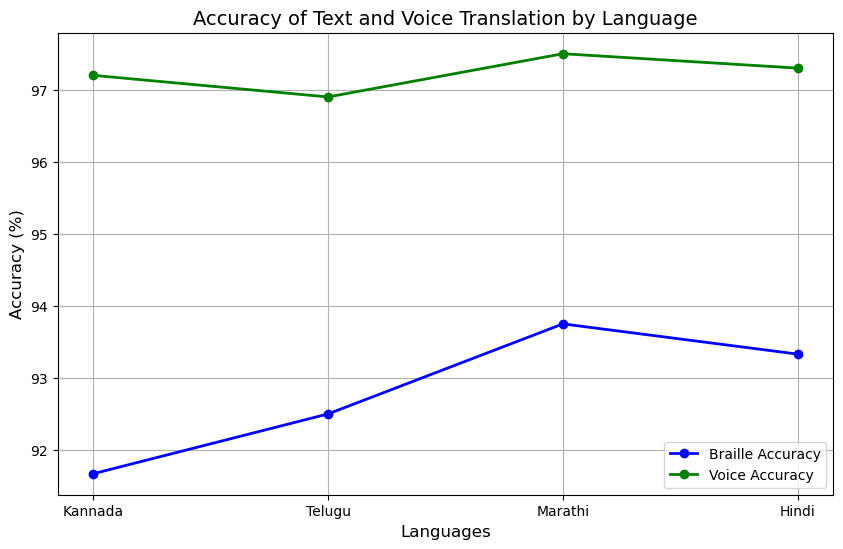

In [19]:
import matplotlib.pyplot as plt

# Data for languages and their respective accuracy values
languages = ['Kannada', 'Telugu', 'Marathi', 'Hindi']
braille_accuracies = [91.67, 92.5, 93.75, 93.33]  # Braille translation accuracy in %
voice_accuracies = [97.2, 96.9, 97.5, 97.3]  # Voice translation accuracy in %

# Create the line graph
plt.figure(figsize=(10, 6))
plt.plot(languages, braille_accuracies, marker='o', label='Braille Accuracy', color='blue', linestyle='-', linewidth=2)
plt.plot(languages, voice_accuracies, marker='o', label='Voice Accuracy', color='green', linestyle='-', linewidth=2)

# Adding titles and labels
plt.title('Accuracy of Text and Voice Translation by Language', fontsize=14)
plt.xlabel('Languages', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)

# Adding grid for better readability
plt.grid(True)

# Adding a legend to indicate which line corresponds to which accuracy
plt.legend()

# Show the plot
plt.show()


In [1]:
pip install googletrans==4.0.0-rc1 gTTS


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install googletrans gtts SpeechRecognition pyaudio


Note: you may need to restart the kernel to use updated packages.


# Integration Of All Languages 

In [2]:
import os
from googletrans import Translator
from gtts import gTTS
import speech_recognition as sr

# Unified Braille mapping for all languages
BRAILLE_MAPPING = {
    # Vowels 
    #KANNADA
    'ಅ': '⠁', 'ಆ': '⠃', 'ಇ': '⠉', 'ಈ': '⠋',
    'ಉ': '⠙', 'ಊ': '⠑', 'ಋ': '⠚', 'ಎ': '⠛',
    'ಏ': '⠓', 'ಐ': '⠊', 'ಒ': '⠚', 'ಓ': '⠅',
    'ಔ': '⠇', 'ಅಂ': '⠃⠂', 'ಅಃ': '⠃⠒',

    # Consonants
    'ಕ': '⠈', 'ಖ': '⠒', 'ಗ': '⠌', 'ಘ': '⠜', 'ಙ': '⠤',
    'ಚ': '⠨', 'ಛ': '⠔', 'ಜ': '⠴', 'ಝ': '⠜', 'ಞ': '⠦',
    'ಟ': '⠤', 'ಠ': '⠔', 'ಡ': '⠥', 'ಢ': '⠧', 'ಣ': '⠱',
    'ತ': '⠐', 'ಥ': '⠙', 'ದ': '⠚', 'ಧ': '⠛', 'ನ': '⠝',
    'ಪ': '⠕', 'ಫ': '⠗', 'ಬ': '⠃', 'ಭ': '⠍', 'ಮ': '⠎',
    'ಯ': '⠽', 'ರ': '⠗', 'ಲ': '⠇', 'ವ': '⠺', 'ಶ': '⠹',
    'ಷ': '⠸', 'ಸ': '⠯', 'ಹ': '⠓', 'ಳ': '⠪', 'ಕ್ಷ': '⠯⠭',
    'ಜ್ಞ': '⠵',

    # Vowel Modifiers
    'ಾ': '⠃', 'ಿ': '⠉', 'ೀ': '⠋', 'ು': '⠙', 'ೂ': '⠑',
    'ೃ': '⠚', 'ೆ': '⠛', 'ೇ': '⠓', 'ೈ': '⠊', 'ೊ': '⠚',
    'ೋ': '⠅', 'ೌ': '⠇', 'ಂ': '⠂', 'ಃ': '⠒',

    # Numbers
    '೦': '⠴', '೧': '⠂', '೨': '⠆', '೩': '⠒', '೪': '⠲',
    '೫': '⠢', '೬': '⠖', '೭': '⠶', '೮': '⠦', '೯': '⠔',

    # Punctuation
    '।': '⠶', '॥': '⠲', ',': '⠂', '.': '⠲', '?': '⠦',
    '!': '⠖', '-': '⠤', '(': '⠶', ')': '⠶', '\"': '⠶',
    '\'': '⠄', ' ': ' ' , # Space

    # Vowels
    #Telugu
    'అ': '⠁', 'ఆ': '⠃', 'ఇ': '⠉', 'ఈ': '⠋',
    'ఉ': '⠙', 'ఊ': '⠑', 'ఋ': '⠚', 'ఎ': '⠛',
    'ఏ': '⠓', 'ఐ': '⠊', 'ಒ': '⠚', 'ఓ': '⠅',
    'ఔ': '⠇', 'అం': '⠃⠂', 'అః': '⠃⠒',

    # Consonants
    'క': '⠈', 'ఖ': '⠒', 'గ': '⠌', 'ఘ': '⠜', 'ఙ': '⠤',
    'చ': '⠨', 'ఛ': '⠔', 'జ': '⠴', 'ఝ': '⠜', 'ఞ': '⠦',
    'ట': '⠤', 'ఠ': '⠔', 'డ': '⠥', 'ఢ': '⠧', 'ణ': '⠱',
    'త': '⠐', 'థ': '⠙', 'ద': '⠚', 'ధ': '⠛', 'న': '⠝',
    'ప': '⠕', 'ఫ': '⠗', 'బ': '⠃', 'భ': '⠍', 'మ': '⠎',
    'య': '⠽', 'ర': '⠗', 'ల': '⠇', 'వ': '⠺', 'శ': '⠹',
    'ష': '⠸', 'స': '⠯', 'హ': '⠓', 'ళ': '⠪', 'క్ష': '⠯⠭',
    'జ్ఞ': '⠵',

    # Vowel Modifiers
    'ా': '⠃', 'ి': '⠉', 'ీ': '⠋', 'ు': '⠙', 'ూ': '⠑',
    'ృ': '⠚', 'ె': '⠛', 'ే': '⠓', 'ై': '⠊', 'ొ': '⠚',
    'ో': '⠅', 'ౌ': '⠇', 'ం': '⠂', 'ః': '⠒',

    # Numbers
    '౦': '⠴', '౧': '⠂', '౨': '⠆', '౩': '⠒', '౪': '⠲',
    '౫': '⠢', '౬': '⠖', '౭': '⠶', '౮': '⠦', '౯': '⠔',

    # Punctuation
    '।': '⠶', '॥': '⠲', ',': '⠂', '.': '⠲', '?': '⠦',
    '!': '⠖', '-': '⠤', '(': '⠶', ')': '⠶', '\"': '⠶',
    '\'': '⠄', ' ': ' ',

     # Vowels
    #marathi
    'अ': '⠁', 'आ': '⠃', 'इ': '⠉', 'ई': '⠋',
    'उ': '⠙', 'ऊ': '⠑', 'ऋ': '⠚', 'ए': '⠛',
    'ऐ': '⠓', 'ओ': '⠚', 'औ': '⠅', 'अं': '⠃⠂',
    'अः': '⠃⠒',

    # Consonants
    'क': '⠈', 'ख': '⠒', 'ग': '⠌', 'घ': '⠜', 'ङ': '⠤',
    'च': '⠨', 'छ': '⠔', 'ज': '⠴', 'झ': '⠜', 'ञ': '⠦',
    'ट': '⠤', 'ठ': '⠔', 'ड': '⠥', 'ढ': '⠧', 'ण': '⠱',
    'त': '⠐', 'थ': '⠙', 'द': '⠚', 'ध': '⠛', 'न': '⠝',
    'प': '⠕', 'फ': '⠗', 'ब': '⠃', 'भ': '⠍', 'म': '⠎',
    'य': '⠽', 'र': '⠗', 'ल': '⠇', 'व': '⠺', 'श': '⠹',
    'ष': '⠸', 'स': '⠯', 'ह': '⠓', 'ळ': '⠪', 'क्ष': '⠯⠭',
    'ज्ञ': '⠵',

    # Vowel Modifiers
    'ा': '⠃', 'ि': '⠉', 'ी': '⠋', 'ु': '⠙', 'ू': '⠑',
    'ृ': '⠚', 'े': '⠛', 'े': '⠓', 'ै': '⠊', 'ो': '⠚',
    'ौ': '⠅', 'ं': '⠂', 'ः': '⠒',

    # Numbers
    '०': '⠴', '१': '⠂', '२': '⠆', '३': '⠒', '४': '⠲',
    '५': '⠢', '६': '⠖', '७': '⠶', '८': '⠦', '९': '⠔',

    # Punctuation
    '।': '⠶', '॥': '⠲', ',': '⠂', '.': '⠲', '?': '⠦',
    '!': '⠖', '-': '⠤', '(': '⠶', ')': '⠶', '\"': '⠶',
    '\'': '⠄', ' ': ' ',

    # Numbers
    '೦': '⠴', '೧': '⠂', '೨': '⠆', '೩': '⠒', '೪': '⠲',
    '౦': '⠴', '౧': '⠂', '౨': '⠆', '౩': '⠒', '౪': '⠲',
    '०': '⠴', '१': '⠂', '२': '⠆', '३': '⠒', '४': '⠲',

    # Punctuation
    ',': '⠂', '.': '⠲', '?': '⠦', '!': '⠖', '-': '⠤',
    '(': '⠶', ')': '⠶', '\"': '⠶', '\'': '⠄', ' ': ' ',
    # Vowels
    #hindi
    'अ': '⠁', 'आ': '⠃', 'इ': '⠉', 'ई': '⠋',
    'उ': '⠙', 'ऊ': '⠑', 'ऋ': '⠚', 'ए': '⠛',
    'ऐ': '⠓', 'ओ': '⠚', 'औ': '⠅', 'अं': '⠃⠂',
    'अः': '⠃⠒',

    # Consonants
    'क': '⠈', 'ख': '⠒', 'ग': '⠌', 'घ': '⠜', 'ङ': '⠤',
    'च': '⠨', 'छ': '⠔', 'ज': '⠴', 'झ': '⠜', 'ञ': '⠦',
    'ट': '⠤', 'ठ': '⠔', 'ड': '⠥', 'ढ': '⠧', 'ण': '⠱',
    'त': '⠐', 'थ': '⠙', 'द': '⠚', 'ध': '⠛', 'न': '⠝',
    'प': '⠕', 'फ': '⠗', 'ब': '⠃', 'भ': '⠍', 'म': '⠎',
    'य': '⠽', 'र': '⠗', 'ल': '⠇', 'व': '⠺', 'श': '⠹',
    'ष': '⠸', 'स': '⠯', 'ह': '⠓', 'ळ': '⠪', 'क्ष': '⠯⠭',
    'ज्ञ': '⠵',

    # Vowel Modifiers
    'ा': '⠃', 'ि': '⠉', 'ी': '⠋', 'ु': '⠙', 'ू': '⠑',
    'ृ': '⠚', 'े': '⠛', 'े': '⠓', 'ै': '⠊', 'ो': '⠚',
    'ौ': '⠅', 'ं': '⠂', 'ः': '⠒',

    # Numbers
    '०': '⠴', '१': '⠂', '२': '⠆', '३': '⠒', '४': '⠲',
    '५': '⠢', '६': '⠖', '७': '⠶', '८': '⠦', '९': '⠔',

    # Punctuation
    '।': '⠶', '॥': '⠲', ',': '⠂', '.': '⠲', '?': '⠦',
    '!': '⠖', '-': '⠤', '(': '⠶', ')': '⠶', '\"': '⠶',
    '\'': '⠄', ' ': ' '  # Space
}

def text_to_braille(text):
    braille_text = ''.join(BRAILLE_MAPPING.get(char, char) for char in text)
    return braille_text

def translate_text(input_text, src_lang='en', dest_lang='hi'):
    translator = Translator()
    translated_text = translator.translate(input_text, src=src_lang, dest=dest_lang).text
    return translated_text

def speak_text(text):
    tts = gTTS(text=text, lang='en')
    tts.save("output.mp3")
    os.system("start output.mp3")

def recognize_speech_from_mic():
    recognizer = sr.Recognizer()
    mic = sr.Microphone()

    with mic as source:
        print("Please speak now...")
        recognizer.adjust_for_ambient_noise(source)
        audio = recognizer.listen(source)
    
    try:
        text = recognizer.recognize_google(audio)
        print(f"Recognized Text: {text}")
        return text
    except sr.UnknownValueError:
        print("Sorry, I could not understand the audio.")
        return None
    except sr.RequestError as e:
        print(f"Could not request results from Google Speech Recognition service; {e}")
        return None

def main():
    print("Select the language for translation:")
    print("1. Hindi")
    print("2. Telugu")
    print("3. Marathi")
    print("4. Kannada (Default)")

    lang_choice = input("Enter your choice (1-4): ").strip()

    if lang_choice == "1":
        dest_lang = 'hi'  # Hindi
    elif lang_choice == "2":
        dest_lang = 'te'  # Telugu
    elif lang_choice == "3":
        dest_lang = 'mr'  # Marathi
    elif lang_choice == "4":
        dest_lang = 'kn'  # Kannada
    else:
        print("Invalid choice. Defaulting to Kannada.")
        dest_lang = 'kn'

    choice = input("Choose input type (1 for text, 2 for voice): ").strip()

    if choice == "1":
        # Text input
        user_input = input("Enter the text: ").strip()
    elif choice == "2":
        # Voice input
        user_input = recognize_speech_from_mic()
        if user_input is None:
            return
    else:
        print("Invalid choice.")
        return
    
    print(f"Original Text: {user_input}")
    
    # Translate and convert text to Braille
    translated_text = translate_text(user_input, src_lang='en', dest_lang=dest_lang)
    print(f"Translated Text: {translated_text}")
    
    braille_output = text_to_braille(translated_text)
    print(f"Braille Output: {braille_output}")
    
    # Optional: Output the Braille in audio format
    speak_text(f"Here is the Braille representation: {translated_text}")

if __name__ == "__main__":
    main()

Select the language for translation:
1. Hindi
2. Telugu
3. Marathi
4. Kannada (Default)
Enter your choice (1-4): 1
Choose input type (1 for text, 2 for voice): 1
Enter the text: Hi how are you
Original Text: Hi how are you
Translated Text: हैलो, क्या हाल हैं
Braille Output: ⠓⠊⠇⠚⠂ ⠈्⠽⠃ ⠓⠃⠇ ⠓⠊⠂
